# Plotting fan coil data points

Number of fan coils required: 64


Text(0.5, 1.0, 'Fan coil cooling model')

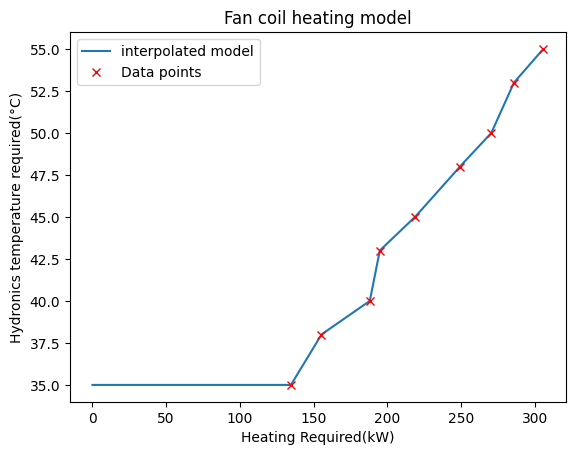

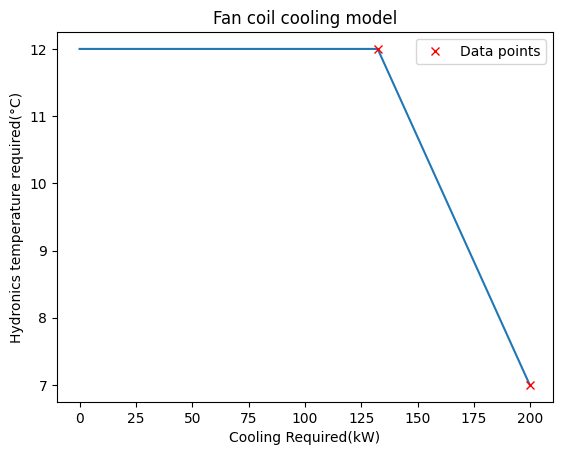

In [13]:
from Modules.Heating import Heating_Distribution
import Modules.Data as Data
import matplotlib.pyplot as plt
import numpy as np

max_HP_power = 305 # in kW
max_HVAC_power = 175 # in kW

Heating_Distribution = Heating_Distribution("Data/HFP-550LM-Z1", max_HP_power, max_HVAC_power)

heating = np.linspace(0, max_HP_power, 1000)
temperature = Heating_Distribution.interp_flow_temp_heating(heating)

plt.figure(1)
plt.plot(heating, temperature, label="interpolated model")

flow_temp = Data.column_from_csv("Data/HFP-550LM-Z1/Heating.csv", "Water Inlet Temp (°C)")
heating = Heating_Distribution.fan_coil_count * Data.column_from_csv("Data/HFP-550LM-Z1/Heating.csv", "Heating Delivered (kW)") 

plt.plot(heating, flow_temp, marker='x', color='r', linestyle='None', label="Data points")
plt.legend()
plt.xlabel('Heating Required(kW)')
plt.ylabel('Hydronics temperature required(°C)')
plt.title('Fan coil heating model')

cooling = np.linspace(0, 200, 1000)
temperature = Heating_Distribution.interp_flow_temp_cooling(cooling)

plt.figure(2)
plt.plot(cooling, temperature)

flow_temp = Data.column_from_csv("Data/HFP-550LM-Z1/Cooling.csv", "Water Inlet Temp (°C)")
cooling = Heating_Distribution.fan_coil_count * Data.column_from_csv("Data/HFP-550LM-Z1/Cooling.csv", "Cooling Delivered (kW)") 

plt.plot(cooling, flow_temp, marker='x', color='r', linestyle='None', label="Data points")
plt.legend()
plt.xlabel('Cooling Required(kW)')
plt.ylabel('Hydronics temperature required(°C)')
plt.title('Fan coil cooling model')